In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv("UpdatedResumeDataSet.csv", encoding="utf-8")

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
df.Category.value_counts()

### assign high ranks, ordinal encoding

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Operations Manager           40
ETL Developer                40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
df["Cleaned_Resume"]=''
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


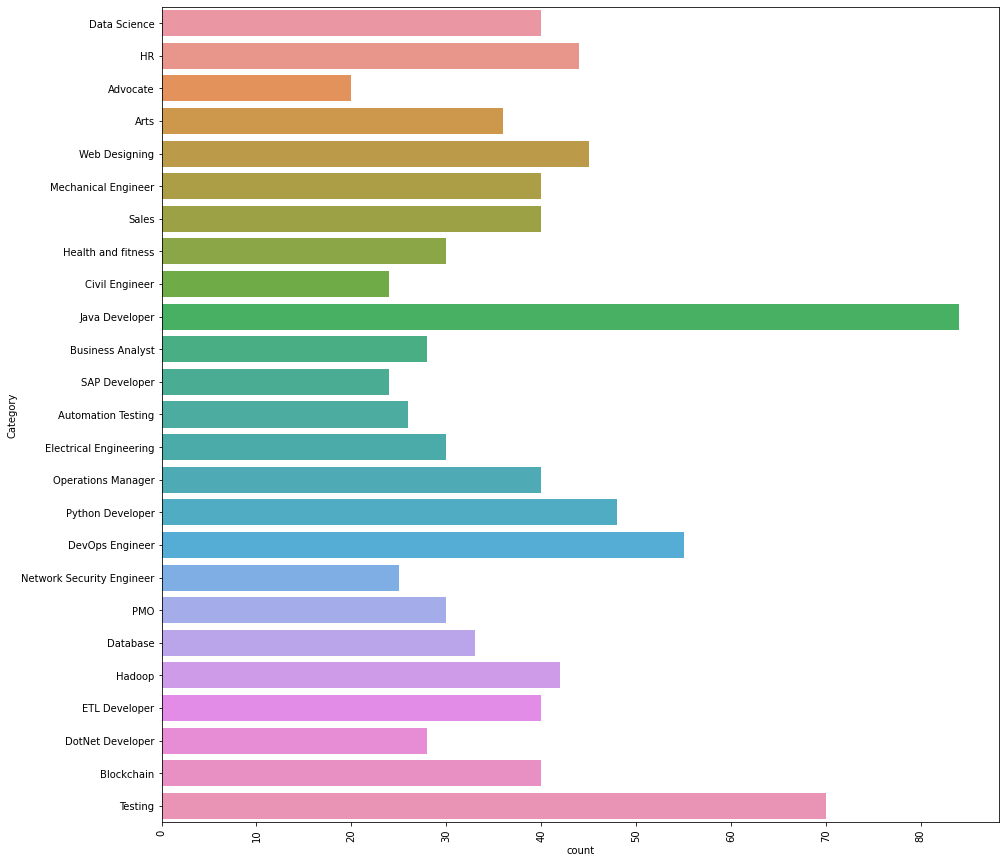

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

##Grid Spec

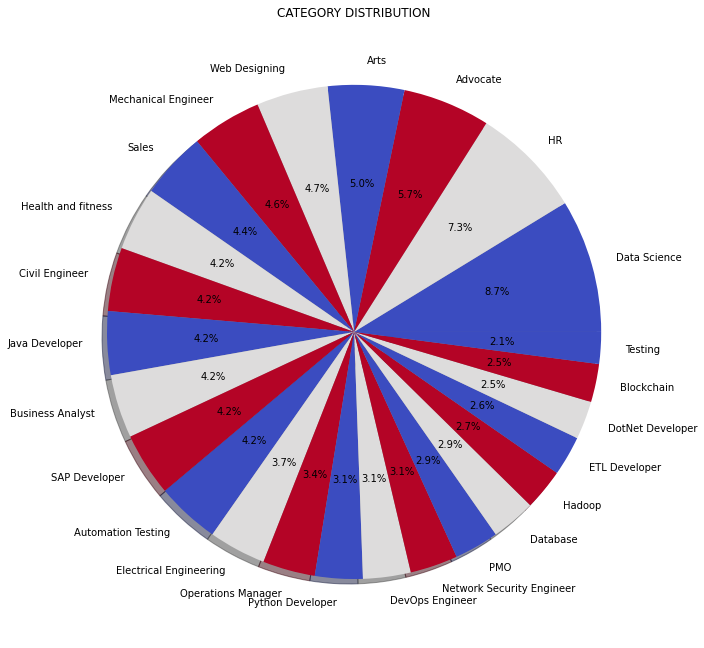

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

##Function to remove the URLs, hashtags, mentions, special letters, and punctuations

In [ ]:
import re

def clean_resume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


In [ ]:
df.Cleaned_Resume=df.Resume.apply(lambda x: clean_resume(x))

In [ ]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df.shape

(962, 3)

In [ ]:
print(df.Resume[1])

Education Details 
May 2013 to May 2017 B.E   UIT-RGPV
Data Scientist 

Data Scientist - Matelabs
Skill Details 
Python- Exprience - Less than 1 year months
Statsmodels- Exprience - 12 months
AWS- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Sklearn- Exprience - Less than 1 year months
Scipy- Exprience - Less than 1 year months
Keras- Exprience - Less than 1 year monthsCompany Details 
company - Matelabs
description - ML Platform for business professionals, dummies and enthusiasts.
60/A Koramangala 5th block,
Achievements/Tasks behind sukh sagar, Bengaluru,
India                               Developed and deployed auto preprocessing steps of machine learning mainly missing value
treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.
Deployed automated classification and regression model.
linkedin.com/in/aditya-rathore-
b4600b146                           Reasearch and deployed the time series foreca

In [ ]:
print(df.Cleaned_Resume[1])

Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github com

##Wordcloud. A Wordcloud represents the most numbers of words larger and vice versa

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Making a lis tof all words

In [ ]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
sentences = df['Cleaned_Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = sentences[i]
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [ ]:
## most common 50 words
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


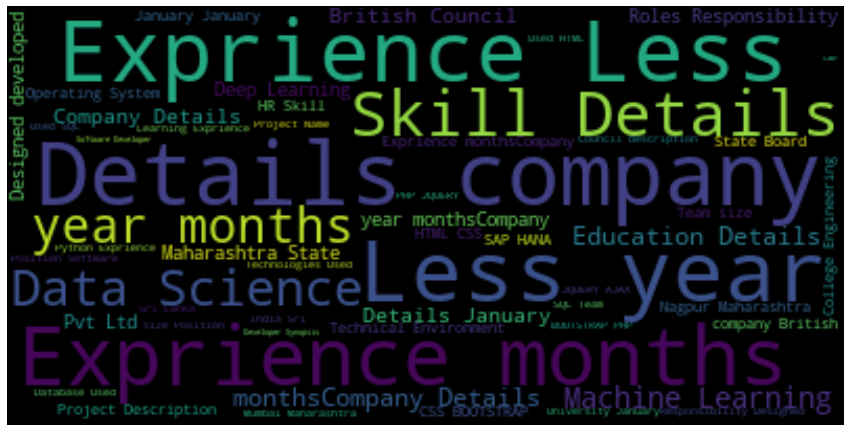

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

### ranks can be given accordingly by the company
categories=df.Category

In [ ]:
fields=list(categories.value_counts(ascending=True).to_dict().keys())


In [ ]:
fields

['Advocate',
 'SAP Developer',
 'Civil Engineer',
 'Network Security Engineer',
 'Automation Testing',
 'Business Analyst',
 'DotNet Developer',
 'Health and fitness',
 'Electrical Engineering',
 'PMO',
 'Database',
 'Arts',
 'Mechanical Engineer',
 'Sales',
 'Data Science',
 'ETL Developer',
 'Operations Manager',
 'Blockchain',
 'Hadoop',
 'HR',
 'Web Designing',
 'Python Developer',
 'DevOps Engineer',
 'Testing',
 'Java Developer']

In [ ]:
oe=OrdinalEncoder(categories=[fields])

In [ ]:
category=pd.DataFrame(df.iloc[:,0])

In [ ]:
category

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [ ]:
oe.fit(category)

OrdinalEncoder(categories=[['Advocate', 'SAP Developer', 'Civil Engineer',
                            'Network Security Engineer', 'Automation Testing',
                            'Business Analyst', 'DotNet Developer',
                            'Health and fitness', 'Electrical Engineering',
                            'PMO', 'Database', 'Arts', 'Mechanical Engineer',
                            'Sales', 'Data Science', 'ETL Developer',
                            'Operations Manager', 'Blockchain', 'Hadoop', 'HR',
                            'Web Designing', 'Python Developer',
                            'DevOps Engineer', 'Testing', 'Java Developer']],
               dtype=<class 'numpy.float64'>)

In [ ]:
category=pd.DataFrame(oe.fit_transform(category))

In [ ]:
df.drop("Category", axis=1, inplace=True)
final_data=pd.concat((df, category), axis=1)


In [ ]:
final_data

,Resume,Cleaned_Resume,0
0,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,14.0
1,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,14.0
2,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,14.0
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,14.0
4,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,14.0
...,...,...,...
957,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...,23.0
958,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...,23.0
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...,23.0
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...,23.0


In [ ]:
final_data.columns

Index(['Resume', 'Cleaned_Resume', 0], dtype='object')

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [ ]:
requiredText = final_data['Cleaned_Resume'].values
requiredTarget = final_data[0].values

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
cm=word_vectorizer.transform(requiredText).toarray()

In [ ]:
WordFeatures_ = pd.DataFrame(word_vectorizer.transform(requiredText).toarray(), columns=word_vectorizer.get_feature_names())

In [ ]:
WordFeatures_

,01,07,10,10g,11,11g,12,13,14,15,16,17,19,20,2000,2003,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,21,24,26,27,28,2nd,30,300,31,36,...,vision,visit,vista,visual,visualization,volume,vpn,wallet,warehouse,warehousing,water,wave,ways,web,webi,website,weekly,wide,win,windows,wipro,wiring,word,work,worked,workflow,working,works,workshop,world,worldwide,writing,written,wrote,www,xml,xp,year,years,zone
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070931,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.113847,0.000000,0.034532,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030443,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.108761,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.107747,0.000000,0.000000,0.000000,0.090089,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.081568,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.200753,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200924,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.085097,0.000000,0.068207,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.128706,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071525,0.0,0.0,0.0,0.0,0.0,0.065120,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.052064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.174890,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.051231,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034970,0.00000,0.031488,0.000000,0.000000,0.034315,0.031615,0.000000,0.000000,0.028691,0.032889,0.050294,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.04464,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.026259,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.063935,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.436921,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.043852,0.0,0.0,0.115389,0.064234,0.000000,0.0,0.035060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
958,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.062903,0.000000,0.000000,0.055819,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.053293,0.0,0.0

In [ ]:
WordFeatures

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 113017 stored elements in Compressed Sparse Row format>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction, target_names=fields)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
            SAP Developer       1.00      1.00      1.00         4
           Civil Engineer       0.83      1.00      0.91         5
Network Security Engineer       1.00      1.00      1.00         4
       Automation Testing       1.00      0.80      